In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline   

In [6]:
assets = ['AAPL', 'MSFT']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2022') ['Adj Close']  #Adj Close é a coluna
pf_data

,AAPL,MSFT
Date,,
2022-01-03,181.778397,334.059265
2022-01-04,179.471344,328.331116
2022-01-05,174.697418,315.727173
2022-01-06,171.781143,313.232330
2022-01-07,171.950928,313.391998
...,...,...
2022-04-26,156.800003,270.220001
2022-04-27,156.570007,283.220001
2022-04-28,163.639999,289.630005


<AxesSubplot:xlabel='Date'>

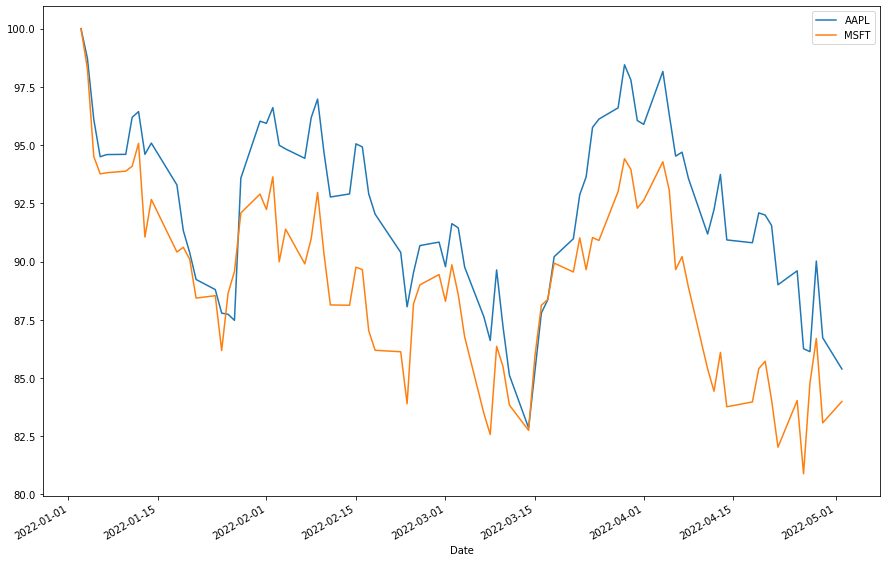

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (15,10))    # Normaliza os dados para abase 100 e plotar o gráfico

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))  # Calcular o retorno logarítimo

In [7]:
log_returns.mean() * 420   #Média dos retornosa 

AAPL    0.429184
MSFT    0.335285
dtype: float64

In [8]:
log_returns.cov() * 420  # Covariancia 

,AAPL,MSFT
AAPL,0.131776,0.067464
MSFT,0.067464,0.106053


In [139]:
log_returns.corr()  # Canculando a correlação 

,AAPL,MSFT
AAPL,1.000000,0.564846
MSFT,0.564846,1.000000


In [140]:
num_assets = len(assets)   #Dois ativos
num_assets

2

In [141]:
weights = np.random.random(num_assets)    # Nova matriz np
weights /= np.sum(weights)    # /= Singnifica atribuir a varialvel do lado esquerdo para o lado direito 
weights

array([0.12870221, 0.87129779])

In [142]:
weights[0] + weights[1]

1.0

-------------------------------------------------------------------------------------------------

In [143]:
np.sum(weights * log_returns.mean()) * 420

0.3727392631537501

In [144]:
np.dot(weights.T, np.dot(log_returns.cov() * 420,weights))   #Informa a covariancia e o desvio padrão respctivamente 

0.09717365830685895

In [145]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 420,weights)))    #Formula para o desvio padrão

0.3117268969897512

In [146]:
pfolio_returns = []
pfolio_volatilities = []
 #Calcula o retorno esperado da cateira versus o portifólio
for x in range(1000):  #Criando um loop                
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) *420)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 420, weights))))

pfolio_returns, pfolio_volatilities

([0.418117051816569,
  0.4069809436573948,
  0.4062729974265014,
  0.3905098347710187,
  0.3918081072801906,
  0.40837001501213954,
  0.405851451622025,
  0.42260950253673507,
  0.3628919682982855,
  0.4071945695978782,
  0.384772929691596,
  0.4466064263721998,
  0.3942192570749219,
  0.3851908540705696,
  0.4080580849738803,
  0.4199980531112869,
  0.4016530595228396,
  0.42547926180352574,
  0.4433731466089148,
  0.42211204254780005,
  0.4118676764253121,
  0.40916149124256246,
  0.3784269892127107,
  0.4430130740688346,
  0.3812277181955017,
  0.4391755663250421,
  0.4131908669608972,
  0.4047969559137222,
  0.39147623691125133,
  0.4280333291315766,
  0.41971121102932746,
  0.37693490181389366,
  0.4021166469218707,
  0.3940447699355492,
  0.4091166801463494,
  0.3830218219803223,
  0.42825346299974454,
  0.40141854254930653,
  0.4021180343383103,
  0.39366827816289107,
  0.4068742597244425,
  0.4008080822858609,
  0.432610231336069,
  0.40902129621598793,
  0.43653060127632987,
 

In [147]:
#Para organizar as linha em array
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities


(array([0.41811705, 0.40698094, 0.406273  , 0.39050983, 0.39180811,
        0.40837002, 0.40585145, 0.4226095 , 0.36289197, 0.40719457,
        0.38477293, 0.44660643, 0.39421926, 0.38519085, 0.40805808,
        0.41999805, 0.40165306, 0.42547926, 0.44337315, 0.42211204,
        0.41186768, 0.40916149, 0.37842699, 0.44301307, 0.38122772,
        0.43917557, 0.41319087, 0.40479696, 0.39147624, 0.42803333,
        0.41971121, 0.3769349 , 0.40211665, 0.39404477, 0.40911668,
        0.38302182, 0.42825346, 0.40141854, 0.40211803, 0.39366828,
        0.40687426, 0.40080808, 0.43261023, 0.4090213 , 0.4365306 ,
        0.39934276, 0.4054814 , 0.4128493 , 0.41636004, 0.41229921,
        0.41252838, 0.41719557, 0.43481391, 0.4447729 , 0.39869611,
        0.42532931, 0.42011621, 0.40701003, 0.40792355, 0.41479783,
        0.37459364, 0.41421126, 0.39236619, 0.36496557, 0.43423494,
        0.41704381, 0.40775928, 0.43132094, 0.41584078, 0.41515424,
        0.40299742, 0.40480944, 0.38335159, 0.40

-----------------------------------------------------------------------------------------------------------

In [148]:
portfolios = pd.DataFrame({'Return': pfolio_returns,'Volatility': pfolio_volatilities})
portfolios

,Return,Volatility
0,0.418117,0.316194
1,0.406981,0.306245
2,0.406273,0.305800
3,0.390510,0.301978
4,0.391808,0.301846
...,...,...
995,0.428359,0.329899
996,0.387228,0.302670
997,0.415927,0.313812
998,0.361805,0.324631


Text(0, 0.5, 'Expected Return')

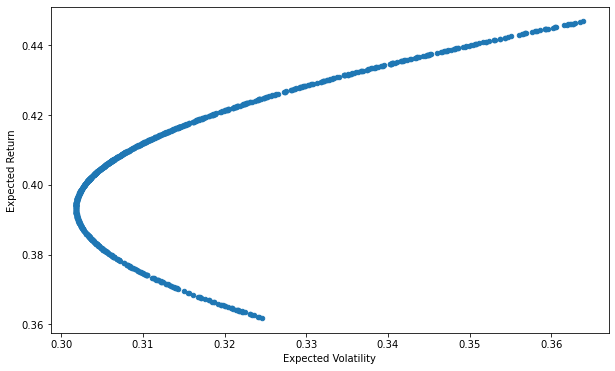

In [149]:
portfolios.plot(x = 'Volatility', y='Return', kind= 'scatter', figsize= (10,6));
plt.xlabel('Expected Volatility')   #Rótulos para x
plt.ylabel('Expected Return')      #Rótulos para y